<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-is-an-example-program" data-toc-modified-id="This-is-an-example-program-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This is an example program</a></span></li></ul></div>

### This is an example program

dsnfjdsbgkhjbdskjlfnldksanfljkdsbngkjbdskjbfkjdsbfkjdsbfkjbdskjfbkjdsbfckjdsxbfkjdsbfkjdsbfkjdsbjkfbdskjbfjkdsbfjkbdsbfbsdbfsdjhbkdhsbfds


This is a formula:

$$ I = \int x dx $$

In [23]:
import numpy as np
from scipy import optimize
from matplotlib import pylab as plt

from glob import glob

from jupyterthemes import jtplot
jtplot.style(theme='chesterish')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

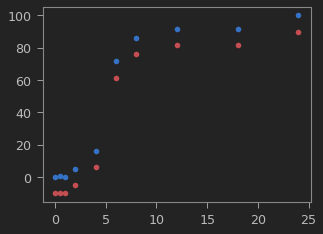

In [24]:
DATA = np.loadtxt("data/PBS.txt",delimiter=",")
x,y,err= DATA.T

plt.plot(x,y,"bo")
plt.plot(x,y-10,"ro")

$f(t,\theta_1,\theta_2,\theta_3,\zeta_1) = \frac{\theta_1}{[1+\zeta e^{(-\theta_2 (t-\theta_3))}]^{1/\zeta}}$

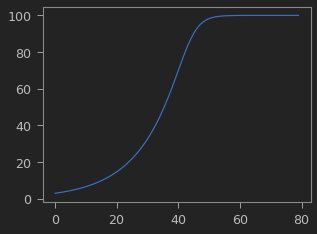

In [25]:
def trf(x,t1,t2,t3,e):
    return t1/(1.+e*np.exp(-t2*(x-t3)))**(1/e)

X = np.arange(80)
T1,T2,T3,ET = 100.,0.4,40.,5.
Y = trf(X,T1,T2,T3,ET)

plt.plot(X,Y)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


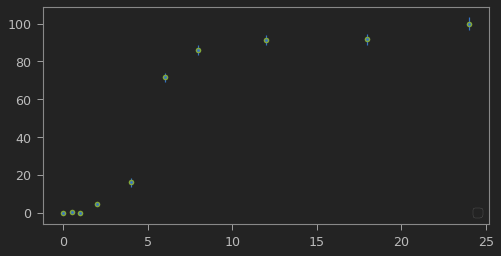

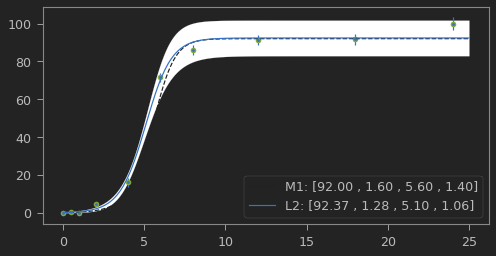

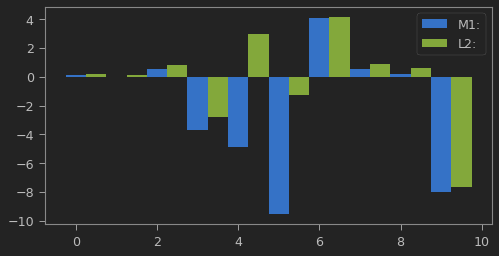

In [26]:
def tostr(x):
    return np.array2string(x, precision=2, 
                           separator=' , ',
                           formatter={'float_kind':lambda x: "%.2f" % x})

DATA = np.loadtxt("data/PBS.txt",delimiter=",")

#print(p)
X0= DATA[:,0]
X = np.linspace(0,25,1000)
T1,T2,T3,ET = 92.,1.6,5.6,1.4
Y = trf(X,T1,T2,T3,ET)

p0  = np.asarray([T1,T2,T3,ET])
p,q = optimize.curve_fit(trf,DATA[:,0],DATA[:,1],sigma=DATA[:,2],
                         bounds=(0.01,np.inf),
                         p0=p0)




plt.figure(figsize=(8,4))
plt.errorbar(DATA[:,0],DATA[:,1],DATA[:,2],fmt=".",capsize=5)
plt.plot(DATA[:,0],DATA[:,1],"o")
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8,4))
plt.errorbar(DATA[:,0],DATA[:,1],DATA[:,2],fmt=".")
plt.plot(DATA[:,0],DATA[:,1],"o")
plt.plot(X,trf(X,*p0),"--k", label="M1: "+tostr(p0))
plt.plot(X,trf(X,*p) , "-b", label="L2: "+tostr(p))

STD = np.diag(q)
en = np.stack([trf(X,*(p-STD)),trf(X,*(p+STD))])
enP= en.max(0)
enM= en.min(0)

plt.fill_between(X,enM,enP,color="w")
#plt.plot(X,trf(X,*(p-STD)) , "-w")
#plt.plot(X,trf(X,*(p+STD)) , "-w")


plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8,4))
#plt.plot(DATA[:,0],DATA[:,1],"o")
plt.bar(np.arange(len(X0))    ,trf(X0,*p0)-DATA[:,1],width=0.5, label="M1:")
plt.bar(np.arange(len(X0))+0.5,trf(X0,*p) -DATA[:,1],width=0.5, label="L2:")
plt.legend(loc="upper right")
plt.show()

NameError: name 'di' is not defined

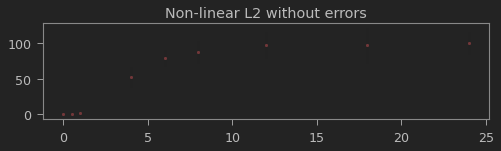

In [28]:
paths = sorted(glob("data/*.txt"))
names = [i.split("/")[-1].split(".")[0] for i in paths]
datas = [np.loadtxt(i,delimiter=",") for i in paths]
datas = [datas[0],datas[2],datas[1]][::-1]
mask  = np.ones((len(datas[0]))).astype(bool)
mask[3] = 0
datas = [i[mask] for i in datas]


def fit_f(x,y,err):
    p00  = np.asarray([100.,1.6,5.6,1.4])
    P,CP = optimize.curve_fit(trf,x,y,#,absolute_sigma=1,sigma=err,
                              bounds=(0.01,np.inf),
                              p0=p00)
    return P, np.sqrt(np.diag(CP))

XX   = np.linspace(0,25,1000)

PdP = np.asarray([fit_f(i[:,0],i[:,1],i[:,2]) for i in datas])

plt.figure(figsize=(8,6))
for n,i in enumerate(PdP):
    plt.subplot(311+n)
    if n == 0:
        plt.title("Non-linear L2 without errors")
    plt.errorbar(datas[n][:,0],datas[n][:,1],datas[n][:,2],fmt=".k",capsize=5,alpha=0.5)
    plt.plot(datas[n][:,0],datas[n][:,1],".r")
    
    
    #plt.plot(XX,trf(XX,*(i[0]+i[1])), "--b",alpha=0.5)
    #plt.plot(XX,trf(XX,*(i[0]-i[1])), "--b",alpha=0.5)

    #DS = 
    
    plt.fill_between(XX,trf(XX,*di),trf(XX,*(i[0]+i[1])),alpha=0.5)
    plt.plot(XX,trf(XX,*i[0]),"--k",label=names[n]+" "+tostr(i[0]))
    plt.ylim([-5,120])
    plt.xlim([-2,26])
    #if n>0:
        #plt.xticks([])
    plt.grid()
    plt.legend(loc="lower right")
plt.subplots_adjust(hspace=0)
plt.savefig("no_err.pdf")
plt.show()
    

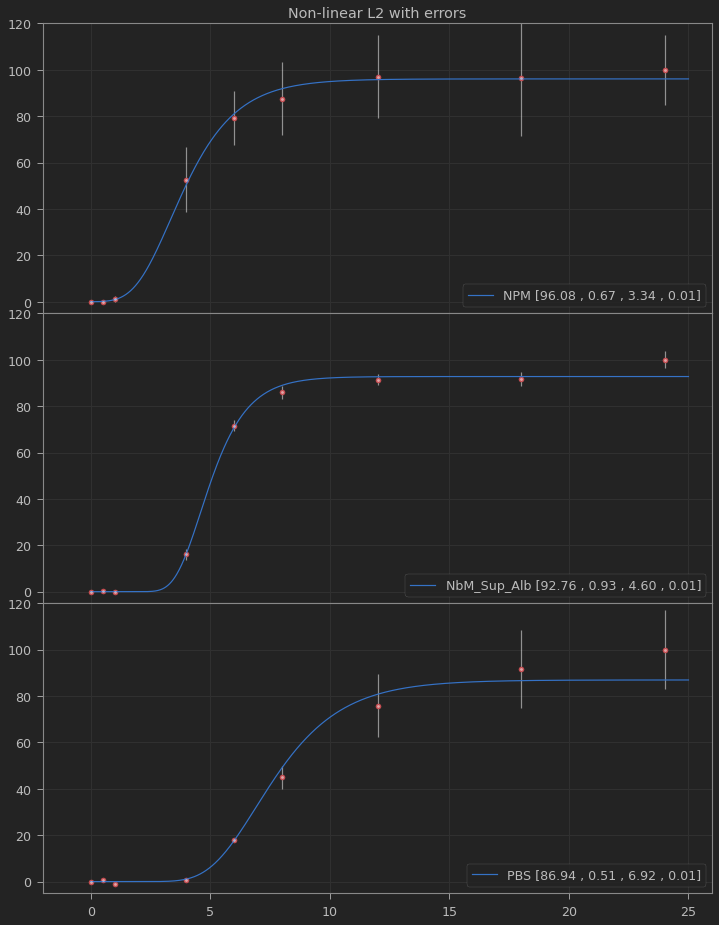

In [31]:
def fit_f(x,y,err):
    p00  = np.asarray([100.,1.6,5.6,1.4])
    P,CP = optimize.curve_fit(trf,x,y,absolute_sigma=1,sigma=err,
                              bounds=(0.01,np.inf),
                              p0=p00)
    return P, np.sqrt(np.diag(CP))

XX   = np.linspace(0,25,1000)

PdP = np.asarray([fit_f(i[:,0],i[:,1],i[:,2]) for i in datas])

plt.figure(figsize=(12,16))
for n,i in enumerate(PdP):
    plt.subplot(311+n)
    if n == 0:
        plt.title("Non-linear L2 with errors")
    plt.errorbar(datas[n][:,0],datas[n][:,1],datas[n][:,2],fmt=".w",capsize=5,alpha=0.5)
    plt.plot(datas[n][:,0],datas[n][:,1],"or")
    
    
    #plt.plot(XX,trf(XX,*(i[0]+i[1])), "--b",alpha=0.5)
    #plt.plot(XX,trf(XX,*(i[0]-i[1])), "--b",alpha=0.5)
    #plt.fill_between(XX,trf(XX,*(i[0]-i[1])),trf(XX,*(i[0]+i[1])),alpha=0.5)
    plt.plot(XX,trf(XX,*i[0]),"-",label=names[n]+" "+tostr(i[0]))
    plt.ylim([-5,120])
    plt.xlim([-2,26])
    #if n>0:
        #plt.xticks([])
    plt.grid()
    plt.legend(loc="lower right")
plt.subplots_adjust(hspace=0)
plt.savefig("err.pdf")
plt.show()

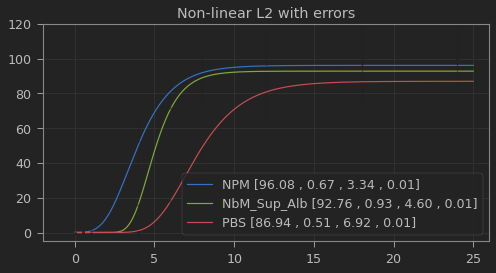

In [32]:
def fit_f(x,y,err):
    p00  = np.asarray([100.,1.6,5.6,1.4])
    P,CP = optimize.curve_fit(trf,x,y,absolute_sigma=1,sigma=err,
                              bounds=(0.01,np.inf),
                              p0=p00)
    return P, np.sqrt(np.diag(CP))

XX   = np.linspace(0,25,1000)

PdP = np.asarray([fit_f(i[:,0],i[:,1],i[:,2]) for i in datas])

plt.figure(figsize=(8,4))
for n,i in enumerate(PdP):
    
    if n == 0:
        plt.title("Non-linear L2 with errors")
    plt.errorbar(datas[n][:,0],datas[n][:,1],datas[n][:,2],fmt=".k",capsize=5,alpha=0.5)
    plt.plot(datas[n][:,0],datas[n][:,1],".k")
    
    
    #plt.plot(XX,trf(XX,*(i[0]+i[1])), "--b",alpha=0.5)
    #plt.plot(XX,trf(XX,*(i[0]-i[1])), "--b",alpha=0.5)
    #plt.fill_between(XX,trf(XX,*(i[0]-i[1])),trf(XX,*(i[0]+i[1])),alpha=0.5)
    plt.plot(XX,trf(XX,*i[0]),"-",label=names[n]+" "+tostr(i[0]))
    plt.ylim([-5,120])
    plt.xlim([-2,26])
    #if n>0:
        #plt.xticks([])
    plt.grid()
    plt.legend(loc="lower right")
plt.subplots_adjust(hspace=0)
plt.savefig("err.pdf")
plt.show()

In [57]:
a = np.zeros((10))
a[5] = np.nan
a[np.isnan(a)] = 0
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[9.61574680e+01 8.41528576e-03 6.59688508e-01 1.03864366e-01
 1.00000000e-03] [3.28526764e+00 1.52948417e+01 1.46254425e-01 2.61794508e+03
 1.77277785e-01]
(2, 100)
[3.29000e+00 1.52900e+01 1.50000e-01 2.61795e+03 1.80000e-01]
---------
[9.27668269e+01 3.14698116e-02 9.29102378e-01 8.82605726e-01
 1.00001861e-03] [4.13665157e+00 2.30142899e+02 3.06302383e+00 1.68780368e+04
 8.72175725e+00]
(2, 100)
[4.140000e+00 2.301400e+02 3.060000e+00 1.687804e+04 8.720000e+00]
---------
[8.71496693e+01 1.69267454e-02 5.08418325e-01 1.35487165e+00
 1.00000007e-03] [3.40463608e+01 6.12310902e+02 8.21480901e-01 6.91429863e+04
 1.21847553e+00]
(2, 100)
[3.405000e+01 6.123100e+02 8.200000e-01 6.914299e+04 1.220000e+00]
---------


/tmp/ipykernel_48402/198071175.py:2: RuntimeWarning: overflow encountered in exp
  return t1/(1.+t2*np.exp(-t3*(x-t4)))**(1/t5)
/tmp/ipykernel_48402/198071175.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return t1/(1.+t2*np.exp(-t3*(x-t4)))**(1/t5)


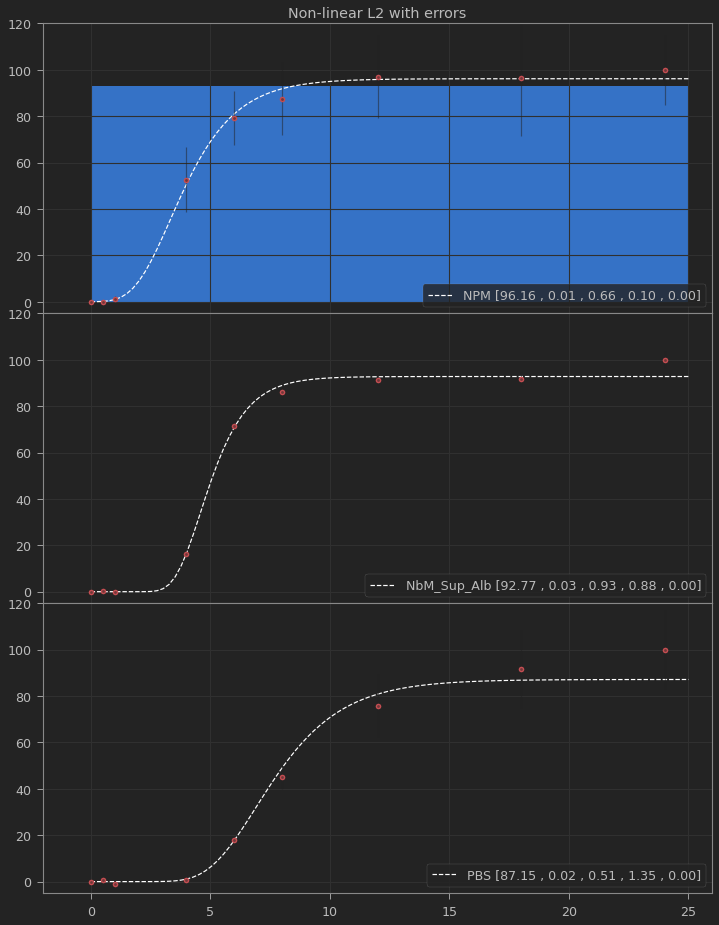

In [97]:
def trf(x,t1,t2,t3,t4,t5):
    return t1/(1.+t2*np.exp(-t3*(x-t4)))**(1/t5)


def fit_f(x,y,err):
    #p00  = np.asarray([100.,1.6,5.6,1.4])
    P,CP = optimize.curve_fit(trf,x,y,
                              #absolute_sigma=104,
                              sigma=err,
                              bounds=(0.001,np.inf),
                              #p0=p00
                              )
    return P, np.sqrt(np.diag(CP))

XX   = np.linspace(0,25,100)

PdP = np.asarray([fit_f(i[:,0],i[:,1],i[:,2]) for i in datas])

plt.figure(figsize=(12,16))
for n,i in enumerate(PdP):
    plt.subplot(311+n)
    if n == 0:
        plt.title("Non-linear L2 with errors")
    
    print(i[0],i[1])
    en  = np.stack([trf(XX,*(i[0]-i[1])),
                    trf(XX,*(i[0]+i[1]))])
    #en[en==np.inf] = 0.
    
    enP = en[1]#.max(0)
    enM = en[0]#.min(0)
    print(en.shape)
    print(np.round(i[1],2))
    print("---------")
    plt.fill_between(XX,enM,enP)
    plt.plot(XX,trf(XX,*i[0]),"--w",label=names[n]+" "+tostr(i[0]))
    
    plt.errorbar(datas[n][:,0],datas[n][:,1],datas[n][:,2],fmt=".k",capsize=5,alpha=0.5)
    plt.plot(datas[n][:,0],datas[n][:,1],"or")
    
    
    #plt.plot(XX,trf(XX,*(i[0]+i[1])), "--b",alpha=0.5)
    #plt.plot(XX,trf(XX,*(i[0]-i[1])), "--b",alpha=0.5)

    plt.ylim([-5,120])
    plt.xlim([-2,26])
    #if n>0:
        #plt.xticks([])
    plt.grid()
    plt.legend(loc="lower right")
plt.subplots_adjust(hspace=0)
plt.savefig("err.pdf")
plt.show()

<ipython-input-14-238b943be738>:3: RuntimeWarning: invalid value encountered in power
  return t1/(1.+e*np.exp(-t2*(x-t3)))**(1/e)
<ipython-input-14-238b943be738>:3: RuntimeWarning: invalid value encountered in power
  return t1/(1.+e*np.exp(-t2*(x-t3)))**(1/e)


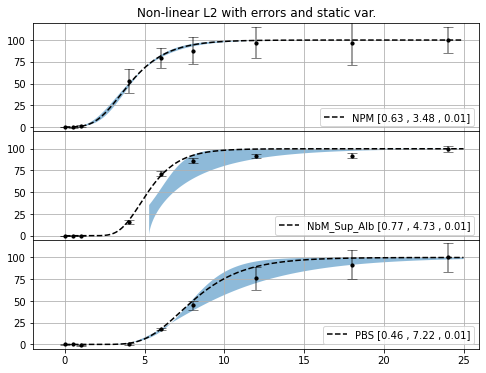

In [14]:
def trfa(x,t2,t3,e):
    t1=100.
    return t1/(1.+e*np.exp(-t2*(x-t3)))**(1/e)

def fit_f(x,y,err):
    p00  = np.asarray([1.6,5.6,1.4])
    P,CP = optimize.curve_fit(trfa,x,y,sigma=err,
                              bounds=(0.01,np.inf),
                              p0=p00)
    return P, np.sqrt(np.diag(CP))

XX   = np.linspace(0,25,1000)

PdP = np.asarray([fit_f(i[:,0],i[:,1],i[:,2]) for i in datas])

plt.figure(figsize=(8,6))
for n,i in enumerate(PdP):
    plt.subplot(311+n)
    if n == 0:
        plt.title("Non-linear L2 with errors and static var.")
    plt.errorbar(datas[n][:,0],datas[n][:,1],datas[n][:,2],fmt=".k",capsize=5,alpha=0.5)
    plt.plot(datas[n][:,0],datas[n][:,1],".k")
    
    plt.plot(XX,trfa(XX,*i[0]),"--k",label=names[n]+" "+tostr(i[0]))
    #plt.plot(XX,trfa(XX,*(i[0]+i[1])), "--b",alpha=0.5)
    #plt.plot(XX,trfa(XX,*(i[0]-i[1])), "--b",alpha=0.5)
    MI = np.vstack([trfa(XX,*(i[0]-i[1])),trfa(XX,*(i[0]+i[1]))]).min(0)
    MA = np.vstack([trfa(XX,*(i[0]-i[1])),trfa(XX,*(i[0]+i[1]))]).max(0)
    
    plt.fill_between(XX,MI,MA,alpha=0.5)
    plt.ylim([-5,120])
    plt.xlim([-2,26])
    #if n>0:
        #plt.xticks([])
    plt.grid()
    plt.legend(loc="lower right")
plt.subplots_adjust(hspace=0)
plt.savefig(r"err_sta_100.pdf")
plt.show()

array([[87.2911589 ,  1.3610255 ,  8.33951746,  2.52939509],
       [59.81347559,  6.45530978,  1.62530715, 12.42584393]])

In [12]:
.shape

(4,)